# Neural Networks and Deep Learning Spring 1400 <img src = 'https://ece.ut.ac.ir/cict-theme/images/footer-logo.png' alt="Tehran-University-Logo" width="150" height="150" align="right">
## Homework 4 - Question 1


### By Omid Vaheb
### 810196582

## Importing required libraries

In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import seed
from numpy.random import rand

## Loading Dataset

In [2]:
(X_train2, y_train2), (X_test2, y_test2) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
X_train = X_train2[0:2000]
y_train = y_train2[0:2000]
X_test = X_test2[0:1000]
y_test = y_test2[0:1000]

## Visualizing Data

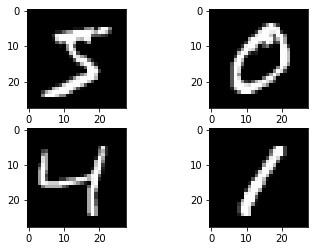

In [86]:
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
plt.show()

In [87]:
X_train.shape

(2000, 28, 28)

## Preparing Data for Training

In [4]:
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape((X_train.shape[0], num_pixels)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], num_pixels)).astype('float32')

In [89]:
X_train.shape

(2000, 784)

In [5]:
X_train = X_train / 255
X_test = X_test / 255

## Random Weight Initialization

In [91]:
W = []
for i in range(784):
  W.append(rand(625))

In [92]:
W = np.array(W)

## Training with Linear Structure and R = 0

In [93]:
alpha = 0.8
power = 0.7
R = 0
for epoch in range(25):
  for x in X_train:
    D = [0] * 625
    for j in range(625):
      D[j] = sum((W[:, j] - x)**2)
    J = D.index(min(D))
    for j in range(J - R, J + R + 1):
      for i in range(784):
        W[i][j] += alpha * (x[i] - W[i][j])
  print(epoch)
  alpha = alpha * power

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


## Evaluating Model

In [98]:
result = np.dot(X_train, W)
targets = []
for i in range(len(result)):
  targets.append(int(np.where(result[i] == min(result[i]))[0]))

In [99]:
outputs = [[0] * 10] * 625
neuron_on = [0] * 625
outputs = np.array(outputs)
for index in range(len(targets)):
  neuron_on[targets[index]] = 1
  outputs[targets[index]][y_train[index]] += 1

In [100]:
labels = []
for i in range(len(outputs)):
  labels.append(int(np.where(outputs[i] == max(outputs[i]))[0][0]))

In [106]:
counter = 0
for i in range(len(y_train)):
  if y_train[i] == labels[targets[i]]:
    counter += 1
print("Accuracy on train data is %.2f percent." %(100 * counter / len(y_train)))

Accuracy on train data is 20.95 percent.


In [102]:
result2 = np.dot(X_test, W)
targets2 = []
for i in range(len(result2)):
  targets2.append(int(np.where(result2[i] == min(result2[i]))[0]))

In [107]:
counter = 0
for i in range(len(y_test)):
  if y_test[i] == labels[targets2[i]]:
    counter += 1
print("Accuracy on test data is %.2f percent." %(100 * counter / len(y_test)))

Accuracy on test data is 22.90 percent.


## Observing Data Distribution Between Neurons

In [174]:
s = 0
for j in range(len(neuron_on)):
  if neuron_on[j] == 1:
    temp = []
    for i in range(len(targets2)):
      if targets2[i] == j:
        temp.append(y_test[i])
    s += len(temp)
    if temp != []:
      print(temp)

[6]
[3]
[1]
[1, 1, 1, 1, 1, 1, 1]
[4, 4, 4, 4, 7]
[1, 1, 1, 1, 1]
[1, 1, 1, 1]
[3]
[1, 1]
[7, 7]
[1, 9, 9, 7, 4, 7]
[1, 1, 1]
[4, 1, 7, 9, 7, 7]
[1]
[1, 1, 1, 1, 1, 1]
[1]
[7, 2, 0, 4, 4, 9, 5, 9, 0, 6, 9, 0, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 3, 3, 4, 7, 2, 7, 2, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 9, 5, 7, 8, 9, 3, 7, 6, 4, 3, 0, 7, 0, 2, 9, 7, 3, 2, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 3, 6, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 9, 4, 8, 3, 9, 4, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 0, 6, 4, 6, 7, 3, 7, 8, 2, 0, 2, 9, 9, 5, 5, 5, 6, 0, 3, 4, 6, 5, 4, 6, 5, 4, 5, 4, 4, 7, 2, 3, 2, 8, 8, 8, 5, 0, 8, 9, 2, 5, 0, 1, 0, 9, 0, 3, 6, 4, 2, 3, 6, 3, 9, 5, 2, 9, 4, 5, 9, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 2, 8, 3, 3, 8, 8, 9, 2, 2, 4, 5, 9, 8, 7, 2, 3, 0, 4, 4, 2, 4, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 8, 0, 3, 0, 9, 9, 4, 8, 2, 2, 9, 5, 9, 2, 6, 4, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 2, 4, 0, 2, 4, 3, 3, 0, 0, 3, 9, 6, 5, 2, 5, 2, 9, 3, 0, 4, 2, 0, 7, 2, 5,

## Training with Linear Structure and R = 2

In [6]:
W = []
for i in range(784):
  W.append(rand(625))
W = np.array(W)

In [7]:
alpha = 0.8
power = 0.7
R = 2
for epoch in range(25):
  for x in X_train:
    D = [0] * 625
    for j in range(625):
      D[j] = sum((W[:, j] - x)**2)
    J = D.index(min(D))
    for j in range(J - R, J + R + 1):
      for i in range(784):
        if (j >= 0) and (j <= 624):
          W[i][j] += alpha * (x[i] - W[i][j])
  print(epoch)
  alpha = alpha * power

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


In [8]:
result = np.dot(X_train, W)
targets = []
for i in range(len(result)):
  targets.append(int(np.where(result[i] == min(result[i]))[0]))

In [9]:
outputs = [[0] * 10] * 625
neuron_on = [0] * 625
outputs = np.array(outputs)
for index in range(len(targets)):
  neuron_on[targets[index]] = 1
  outputs[targets[index]][y_train[index]] += 1

In [10]:
labels = []
for i in range(len(outputs)):
  labels.append(int(np.where(outputs[i] == max(outputs[i]))[0][0]))

In [11]:
counter = 0
for i in range(len(y_train)):
  if y_train[i] == labels[targets[i]]:
    counter += 1
print("Accuracy on train data is %.2f percent." %(100 * counter / len(y_train)))

Accuracy on train data is 39.80 percent.


In [12]:
result2 = np.dot(X_test, W)
targets2 = []
for i in range(len(result2)):
  targets2.append(int(np.where(result2[i] == min(result2[i]))[0]))

In [13]:
counter = 0
for i in range(len(y_test)):
  if y_test[i] == labels[targets2[i]]:
    counter += 1
print("Accuracy on test data is %.2f percent." %(100 * counter / len(y_test)))

Accuracy on test data is 37.10 percent.


In [14]:
s = 0
for j in range(len(neuron_on)):
  if neuron_on[j] == 1:
    temp = []
    for i in range(len(targets2)):
      if targets2[i] == j:
        temp.append(y_test[i])
    s += len(temp)
    if temp != []:
      print(temp)

[1, 1]
[2, 3, 3, 1, 3, 8, 3, 3, 5, 2, 3, 3, 2, 3, 3, 2, 3, 8, 3, 3, 1, 3, 1, 3, 3, 8, 3]
[5, 3, 9, 3, 7, 3, 1, 7, 2, 5, 8, 8, 5, 6, 3, 3, 3, 5, 8, 3, 8, 5, 9, 2, 8, 2, 2, 3, 5, 3, 3, 3, 8, 5, 3, 5, 8, 3, 8, 3, 6, 3, 6, 3, 3, 6, 5, 2, 9, 5, 3, 6, 3, 3, 8, 8, 2, 3, 3, 2, 8, 3, 3, 3, 3, 6, 2, 3, 5, 6, 3, 8, 3, 3, 5, 2, 6, 3, 3, 3, 5, 6, 3, 3, 1, 3, 3, 8, 4, 3, 3]
[9, 5, 3, 8, 5, 5, 8, 8, 5, 5, 2, 8, 2, 5, 3, 5, 8, 3, 0, 5, 5, 3, 9, 3, 8, 3, 6, 5, 9, 3, 8, 2, 7, 8, 8, 8, 8, 8, 3, 2, 8, 3, 8, 2, 3, 8, 5, 6]
[9, 5]
[3, 2, 2, 2, 7, 8, 1, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2]
[2, 3, 3, 3, 3, 3, 3, 3]
[3, 0]
[3, 0, 2, 3, 0, 5, 3, 5, 3, 7, 1, 7, 8, 2, 5, 8, 5, 1, 2, 1, 2, 3, 7, 1]
[7, 0, 5, 9, 7, 1, 3, 7, 7, 3, 1, 6, 5, 9, 7, 7, 6, 1, 6, 2, 5, 4, 7, 6, 4, 6, 6, 5, 1, 1, 6, 9, 5, 7, 7, 7, 8, 2, 7, 0, 6, 5, 9, 0, 7, 4, 0, 5, 4, 5, 7, 1, 5, 2, 7, 0, 3, 7, 6, 9, 8, 5, 7, 4, 9, 8, 7, 3, 3, 6, 0, 8, 9, 5, 7, 3, 3, 7, 0, 7, 7, 0, 4, 8, 9, 7, 0, 5, 9, 3, 9, 1, 6, 7, 5, 5, 7, 6, 7, 0, 5, 7, 6, 7, 3, 0, 7, 7, 9, 

## Training with Two Dimensional Structure and R = 1

In [15]:
W = []
for i in range(784):
  W.append(rand(625))
W = np.array(W)

In [16]:
alpha = 0.8
power = 0.7
R = 1
for epoch in range(25):
  for x in X_train:
    D = [0] * 625
    for j in range(625):
      D[j] = sum((W[:, j] - x)**2)
    J = D.index(min(D))
    neighborhood = [J - 1, J, J + 1, j - 25, j + 25]
    for k in range(len(neighborhood)):
      j = neighborhood[k]
      for i in range(784):
        if (j >= 0) and (j <= 624) and ((J % 25 != 24) and (k == 0)) and ((J % 25 != 0) and (k == 2)):
          W[i][j] += alpha * (x[i] - W[i][j])
  print(epoch)
  alpha = alpha * power

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


In [17]:
result = np.dot(X_train, W)
targets = []
for i in range(len(result)):
  targets.append(int(np.where(result[i] == min(result[i]))[0]))

In [18]:
outputs = [[0] * 10] * 625
neuron_on = [0] * 625
outputs = np.array(outputs)
for index in range(len(targets)):
  neuron_on[targets[index]] = 1
  outputs[targets[index]][y_train[index]] += 1

In [19]:
labels = []
for i in range(len(outputs)):
  labels.append(int(np.where(outputs[i] == max(outputs[i]))[0][0]))

In [20]:
counter = 0
for i in range(len(y_train)):
  if y_train[i] == labels[targets[i]]:
    counter += 1
print("Accuracy on train data is %.2f percent." %(100 * counter / len(y_train)))

Accuracy on train data is 44.50 percent.


In [21]:
result2 = np.dot(X_test, W)
targets2 = []
for i in range(len(result2)):
  targets2.append(int(np.where(result2[i] == min(result2[i]))[0]))

In [22]:
counter = 0
for i in range(len(y_test)):
  if y_test[i] == labels[targets2[i]]:
    counter += 1
print("Accuracy on test data is %.2f percent." %(100 * counter / len(y_test)))

Accuracy on test data is 36.20 percent.


In [23]:
s = 0
for j in range(len(neuron_on)):
  if neuron_on[j] == 1:
    temp = []
    for i in range(len(targets2)):
      if targets2[i] == j:
        temp.append(y_test[i])
    s += len(temp)
    if temp != []:
      print(temp)

[3, 9]
[3, 4, 5, 4]
[5, 6, 8]
[4, 7, 6, 7, 4, 6, 6, 7, 6, 0, 1, 7, 7, 6]
[6, 2]
[1, 8, 8, 8, 4, 8]
[0, 2]
[1, 1, 1, 1]
[7, 7, 4]
[7, 7]
[9, 9]
[7, 8, 6, 4, 3, 8, 3, 3, 4, 3, 3]
[5]
[5, 5, 4, 5]
[1, 7, 1, 1, 9, 1, 1]
[6, 8, 8, 8, 2, 8, 9, 8]
[9, 5, 5, 1, 0]
[0]
[7, 7, 7, 7, 9, 8, 7, 7, 7, 5, 5, 5, 9, 7, 5, 0, 7, 7]
[5, 5, 5, 0, 5, 3, 9, 7]
[7]
[1, 3, 2, 3, 2, 1, 5, 3, 3, 3, 2, 3, 1, 5, 5, 7, 0, 5, 7, 1, 5, 5, 6, 3, 1]
[4, 3]
[6]
[7]
[1, 3, 1, 3]
[3]
[7, 3, 7, 3]
[6]
[0, 0]
[7, 2, 2]
[3]
[9, 9, 6, 3, 9, 5, 1, 1, 8, 8, 2, 4, 4, 8, 1, 9, 7, 7, 1, 1, 1, 5, 1, 1, 7, 1, 8, 1, 4, 6, 6, 3, 1, 5, 3, 9, 3, 8, 8, 9, 4, 9, 5, 8, 2, 1, 1, 3, 3, 3, 6, 4, 4, 1, 3, 6, 4, 1, 4, 2, 3, 6, 1, 1, 5, 3, 1, 3, 1, 6, 8, 5, 6, 1, 6]
[7, 1]
[3, 8, 3, 5, 9, 8, 9, 9, 3, 9, 5, 8, 8, 5, 5, 3, 5, 4, 5, 9, 3, 5, 4, 3, 9, 5, 5, 5, 3, 9, 8, 8, 5, 8, 3, 3, 3]
[7, 7]
[5, 2, 2, 2, 2, 5, 2, 2, 3, 0, 2, 2, 0, 2, 5, 6, 2, 8, 2, 3, 2, 0, 5, 6, 2, 0, 2, 0, 2, 3, 2]
[4, 4]
[7, 7, 8, 7, 0, 5]
[3]
[4, 2, 0, 9, 8, 2]
[5, 9, 8]
[4, 

In [25]:
neuron_on

[0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,


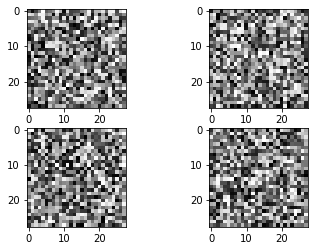

In [52]:
plt.subplot(221)
plt.imshow(W[:, 5].reshape((28, 28)), cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(W[:, 491].reshape((28, 28)), cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(W[:, 22].reshape((28, 28)), cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(W[:, 618].reshape((28, 28)), cmap=plt.get_cmap('gray'))
plt.show()